<a href="https://colab.research.google.com/github/sgr1118/PyTorch/blob/main/Chapter19_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 19.1 순환신경망 소개
- 지금까지는 아래와 같은 신경망 구조를 다뤘다. $y = f(x;\theta)$

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/01-prev_method.png)
<center>기존 신경망 구조</center>

- 이제부터는 아래와 같이 $x_t$ 또는 $h_t$라는 t가 추가된 순환신경망에 대해서 다룰 것이다. $h_t = f(x_t, h_{t-1};\theta)$

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/01-recurrent_method.png)
<center>RNN 구조</center>

- 그리고 t가 끝에 다다르면 비로소 $y = h_t$가 되어 출력값을 얻게 됩니다. 또한 앞 수식에서 특이한 점은 $h_t$를 얻기 위해서 $x_t$뿐만 아니라 $h_{t-1}$도 함께 함수의 입력으로 주어져야 한다는 것이다.

- 즉, 이전 순서의 결과 상태인 $h_{t-1}$을 현재 이력 $x_t$와 함께 함수에 넣어주어 현재 상태 결과인 $h_t$를 구하도록 되어있다.

- 이러한 형태를 RNN(순환신경망)이라고 부른다. RNN은 NLP와 같이 순서 정보가 담긴 데이터나 시계열 데이터를 다루는 데 적합하다.

## 19.2 RNN 한 걸음씩 들여다보기

### 1. 기본적인 RNN 구조

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/02-rnn.png)
<center>기본적인 RNN 구조</center>

- RNN은 다음 수식처럼 네 개의 가중피 파라미터를 가진다.
- \begin{gathered}
\begin{aligned}
\hat{y}_t=h_t&=f(x_t,h_{t-1};\theta) \\
&=\tanh(W_{ih}x_t+b_{ih}+W_{hh}h_{t-1}+b_{hh}),
\end{aligned} \\
\text{where }\theta=\{W_{ih},b_{ih},W_{hh},b_{hh}\}.
\end{gathered}

- $W_{ih}, b_{ih}$는 입력 $x_t$에 곱해지고 더해지는 파라미터가 되고 $W_{hh}, b_{hh}$는 이전 순서의 결괏값인 $h_{t-1}$에 곱해지고 더해지는 파라미터이다.

- 이 연산 결괏값을 하이퍼볼릭 탄젠트를 통과시켜 현재 순서의 $h_t$를 얻을 수 있다. 이 $h_t$를 RNN의 은닉 상태라고 부른다. 앞과 같은 그림에 순서의 흐름을 적용하면 아래 그림처럼 표현된다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/02-unroll_rnn.png)
<center>순서에 흐름에 따른 RNN</center>

- 이런 RNN을 학습하는 방법은 기본적으로 모든 순서의 결괏값(은닉상태) $h_t$들을 출력으로 취급하여 학습한다. 그러면 정답 또한 순서 데이터로 $y={y_1,\cdots,y_T}$와 같이 갖고 있어야한다. 다음 그림과 같이 $h_t\Rightarrow\hat{y}_t$가 되어 실제 정답과 비교하는 손실 함수를 구성할 수 있다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/02-how_to_train.png)
<center>RNN의 손실 함수 구성</center>

- \begin{aligned}
\mathcal{L}(\theta)&=\|\hat{y}_1-y_1\|+\cdot+\|\hat{y}_T-y_T\| \\
&=\sum_{t=1}^T{
    \|\hat{y}_t-y_t\|
}
\end{aligned}

- 이런 형태의 RNN을 활용하면 가변 길이의 순서 데이터를 다룰 수 있다. 순서 데이터는 각 순서에 나타나는 값에 따라 앞뒤 순서의 값이 영향을 받을 뿐만 아니라 전체 순서 데이터의 의미가 결정되기도 합니다. 이러한 특성때문에 NLP에서 많이 활용된다.

### 2. RNN의 입출력 텐서 형태
- 당장 이해하기 힘들다면 RNN의 입출력 텐서 형태만 이해하여도 좋다. RNN 구현은 파이토치다 해결해주기 때문이다. 아래 그림은 RNN의 입력 텐서 모양을 시각화 한 것이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/02-rnn_input.png)
<center>RNN의 입력 텐서 형성</center>

- 하나의 순서에 대한 텐서를 $x_t$라고 할 때 앞 그림의 왼쪽과 같은 텐서가 존재할 것이고, 순서가 n개 있다면 오른쪽 그림과 같은 텐서가 될 것이다. 텐서의 첫 번째 차원은 미니배치 내의 인덱스를 가리키고, 두 번째 차원은 순서 정보를 가지며 마지막 차원은 입력 벡터가 된다. 이와 같은 RNN의 입력이 들어간 후 반환되는 출력 텐서에 대해서 알아보자

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/02-rnn_hidden.png)
<center>RNN의 출력 텐서 형태</center>

- 왼쪽 그림의 텐서들이 모여 오른쪽 그림과 같은 텐서를 이루게된다. 입력 텐서와 마찬가지로 각 차원들이 똑같은 의미를 지니고있다. 다만 왼쪽 그림에서는 순서 정보에 대한 차원이 빠진것을 볼 수 있다. 사실 (batch_size, hidden_size) = (batch_size, hidden_size)이므로 여전히 같은 텐서의 형태라고 봐도 무방하다. 즉, 왼쪽 텐서들을 모아서 이어붙이기하면 전체 순서에 대한 출력 $h_{1:n}$이 나오게 된다.

### 3. 다계층 RNN
- RNN도 여러 개층으로 쌓으면 다계층 RNN이라고 부른다. 다음 그림은 다계층 RNN을 그림으로 나타낸 것이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/02-multi_layered_rnn.png)
<center>다계층 RNN</center>

- 다계층 RNN도 각 순서마다 출력 $\hat{y_t}$을 반환하고 있고 실제 정답 $y_t$과 비교하여 손실 함수를 계산하는 것을 볼 수 있다. 이 그림을 자세히보면 각 층마다 오른쪽을 가리키는 화살표가 있다. 단일 RNN에서는 이것을 은닉 상태 $h_{t}$라고 했었고 이것이 곧 출력 $\hat{y_t}$라고 했었다. 하지만 다계층 RNN에서는 여러 층이 동시에 $h_t$를 반환하기 때문에 $\hat{y_t} \neq h_t$가 된다.

- \begin{gathered}
\hat{y}_t=h_{t,3}=\text{RNN}_3(\text{RNN}_2(\text{RNN}_1(x_t,h_{t-1,1}),h_{t-1,2}),h_{t-1,3}), \\
\text{where }h_{t,\ell}=\text{RNN}_\ell(h_{t,\ell-1},h_{t-1,\ell})=\tanh(W_{ih,\ell}\cdot{h_{t,\ell-1}}+b_{ih,\ell}+W_{hh,\ell}\cdot{h_{t-1,\ell}}+b_{hh,\ell})
\text{ and }h_{t,0}=x_t.
\end{gathered}

- 수식을 살펴보아도 각 계층마다 $h_{t, l}$을 반환하고 마지막 계층의 $h_{t, l}$을 받아서 마지막 계층의 $\hat{y_t}$로 삼고 있음을 볼 수 있다. 즉, 다계층 RNN에서의 은닉 상태는 모델의 출력이 되지 않는다. 

- 다음 그림은 다계층 RNN의 입출력 텐서 형태를 알아본다. 다음 그림에서 빨간색 점선 네모로 표시된 부분이 다계층 RNN의 입력이 되는 부분이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/02-multi_layered_rnn_input.png)
<center>다계층 RNN의 입력 텐서</center>

- 이때 입력 텐서의 형태는 앞에서 보았던 단일 계층 RNN의 입력 텐서에 형태와 같습니다. 이번에는 다계층 RNN의 출력 텐서에 대해 알아보자. 다음 그림에서 빨간색 점선 네모로 표시된 부분이 출력 텐서에 해당하는 부분이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/02-multi_layered_rnn_output.png)
<center>다계층 RNN의 출력 텐서</center>

- 마찬가지로 단일 계층 RNN의 출력 텐서와 형태가 같다. 하지만 중요한 점은 단일 계층 RNN에서는 은닉 상태가 곧 출력이 되었던 반면 다계층 RNN에서는 출력과 은닉 상태가 다르다. 이는 다음 그림에서 더 정확히 알 수 있다. 다계층 RNN의 은닉 상태를 빨간색 점선 네모로 표시한 그림이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/02-multi_layered_rnn_hidden.png)
<center>다계층 RNN의 은닉 상태</center>

- 앞 그림에서 볼 수 있듯이 점선 네모의 위치가 달라졌고 텐서의 모양도 변했다. 가장 주목할 점은 앞의 출력 텐서는 순서 정보가 두 번째 차원에 들어가 있는 반면에 은닉 상태 텐서는 어떤 특정 순서상에서 얻을 것이기 때문에 순서 정보가 텐서에 없다. 대신 가장 첫 번째 차원에 미니배치와 관련된 정보가 아니라 계층 순서에 대한 정보가 담겨있다. 그리고 두 번째 차원의 미니배치에 대한 정보가 담겨있다.

### 4. 은닉 상태
- 은닉 상태에는 RNN이 현재 순서까지 입력 $x_1, \cdots , x_i$들을 받아오면서 자신의 상태를 업데이트한 기억을 갖고 있다고 볼 수 있을 것이다. 은닉 상태는 신경망을 통과하는 값일 뿐이며 학습하는 가중치 파라미터가 아니다. 즉, 연산을 하는 부분이지 학습하는 부분은 아니다.

### 5. 양방향 다계층 RNN
- 앞서 본 RNN은 순방향 모델이었다. 즉, 현재 순서의 은닉 상태는 이전 순서의 은닉 상태와 현재 입력에만 의존하게 됩니다. 이러한 모델을 자기회귀 모델이라고 부른다. 라지만 이번에는 추가된 양방향 RNN을 알아본다.

- 다음은 양방향 다계층 RNN을 그림으로 표현한 것이다. 각 층의 RNN 셀은 이전 계층의 정방향과 역방향 결과물을 입력으로 받는다. 그리고 정방향 RNN 셀은 이전 순서의 은닉 상태를 받고 역방향 RNN 셀은 미래 순서의 은닉 상태를 받는다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/02-multi_layered_bi_rnn.png)
<center>양방향 다계층 RNN</center>

- 모델의 입력 텐서 모양은 앞에서 봤던 모델들의 입력 텐서 모양과 같다. 그리고 출력 텐서 모양은 다음 그림과 같다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/02-multi_layered_bi_rnn_output.png)
<center>양방향 다계층 RNN의 출력 텐서</center>

- 앞의 그림의 빨간색 점선으로 표시된 부분에서 볼 수 있듯이 출력 텐서는 마지막 계층의 정방향과 역방향 RNN 셀로부터 출력을 수집한다. 따라서 텐서 형태의 마지막 차원이 \{hidden_size}\times\{#direction}로 되어 기존의2배가 된 것을 볼 수 있다.

- 양방향 RNN의 은닉 상태를 책에서 다루지 않는 이유는 보통 단방향 RNN의 은식 상태를 따로 저장했다가 이어 연산을 진행하는 등의 작업을 수행하는 경우도 많아 은닉 상태를 직접 다룰 일이 많으나 양방향 RNN은 중간에 은닉 상태를 접근할 일이 거의 없기 때문이다.

## 19.3 RNN 활용 사례
- RNN이 가장 많이 활용되는 분야는 NLP이다. NLP에서의 문장은 출현 단어 개수가 가변적이고 단어의 출현 순서에 따라 의미가 결정된다. NLP에서도 다양한 분야가 존재하기 때문에 각 분야에 따라 RNN이 활용되는 방법이 다르다. 아래 표는 활용 타입에 따른 모델 구조와 사용 예제이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/03-usage_type.png)
<center>활용 타입에 따른 모델 구조와 사용 예제</center>

- 모델링하고 자 하는 대상의 자기회귀 성격 여부에 따라 활용 방법이 달라지기도 한다. 자기회귀란 현재 상태가 과거 상태에 의존하여 정해지는 경우를 말한다. 따라서 정보 흐름의 방향이 생기게 되고 이것을 모델링하기 위해서는 단방향 RNN을 사용할 수밖에 없다. 문장을 놓고 문자잉 속하는 클래스 및 긍/부정을 정하는 문제는 이미 분류기에 들어가기 전에 문장 전체가 주어진다. 또한 클래스는 문장 전체에 대해서 단 한 번 예측이 수행되기 때문에 자기회귀 성격을 가진다고 볼 수 없다. 다음은 자기회귀 및 비자기회귀 타입의 모델링에 대해 정리한 것이다.

|타입|자기회귀|비자기회귀|
|-|-|-|
|특징|현재 상태가 과거 상태에 의존하여 정해지는 경우|현재 상태가 과거/미래 상태에 의존하여 정해지는 경우|
|모델링 성격|생성적|비생성적|
|사용 예|자연어 생성, 기계 번역, 챗봇|형태소 분석 태깅, 텍스트 분류|
|활용 모델 구조|양방향 RNN 사용 불가|양방향 RNN 사용 권장|

### 1. 다대일 형태
- 다대일 형태는 우리가 학습할 데이터에서 입력은 순서 정보를 갖고 있고 출력은 순서 정보가 없는 경우이다. 쉽게 말하면 이 케이스는 비자기회귀 성격을 갖는다고 볼 수 있다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/03-many_to_one.png)
<center>다대일 형태의 모델 구조와 손실 함수</center>

- 그림에서 보듯이 양방향 RNN을 사용할 수 있으며 보통 가장 마지막 순서 출력을 할용한다.(가장 처음 순서 출력을 활용해도 괜찮다) 모델의 예측 값으로 삼고 원래 목푯값과 비교하여 손실을 계산하다. 분류가 가장 좋은 예시인데 문장을 정해진 기준에 따라 쪼개어 순서에서 나온 출력을 비선형 활성 함수, 선형 계층, 소프트맥스 함수를 거치도록 하여 각 클래스별 확률 값으로 변환할 수 있다. 그리고 분류 문제이기에 교차 엔트로피 손실 함수를 통과시켜 손실 값을 구할 수 있다.

### 2. 다대다 형태
- 입력과 출력 모두 순서 정보를 가진 데이터가 되는 다대다 형태이다. 중요한 점은 입력과 출력과 순서 개수가 같아야 하며 출력의 각 순서가 입력에 대응되는 형태여야 한다. 그리고 비자기회귀적 성격을 갖는데 아래 그림을 통해 알 수 있다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/03-many_to_many.png)
<center>다대다 형태의 모델 구조와 손실 함수</center>

- 각 순서의 입력 $x_t$마다 대응되는 목푯값 $y_t$가 존재하는 것을 볼 수 있고 모델에서도 각 입력에 대응되는 $\hat{y_t}$가 출력되고 있는 것을 볼 수 있다. 그러면 모든 순서의 출력값과 못푯값의 차이를 합쳐서 손실 값을 계산할 수 있다. 이런 형태가 많이 쓰이는 유형은 형태소 분석이다. 문장 내 토큰들에 대해서 각각 형태소가 태깅되어야하기 때문이다.

### 3. 일대다 형태
- 다음은 생성 모델에서 많이 쓰이는 일대다 형태에 대해 알아보자. 일대다는 입력의 형태보다는 출력의 형태가 더 중요하다. 입력 순서에 1:1 대응되는 것이 아니라 출력에 순서 정보가 존재하는 데이터라면 대부분 일대가 문제가 적용된다. 예시로 자연어 생성 영역인 기계번역, 챗봇 등이 있다. 또는 이미지가 주어졌을 때 해당 이미지를 성명하는 문장을 생성하는 문제도 여기에 해당한다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/03-one_to_many.png)
<center>일대다 형태의 모델 구조</center>

- 앞에서 그림들과는 약간 다른 형태를 띈다. 일단 모델의 입력이 $x$ 하나로 되어있고 이후 순서에는 이전 순서의 모델 출력값 $\hat{y_{t-1}}$이 넣어지는 것을 확인할 수 있다. 따라서 $y_0 = x$라고 가정한다면 $\hat{y_t}$과 $\hat{y_{t-1}}$의 영향을 받아서 자기회귀 성격을 갖게 된다.

- 입력 x에 정보를 넣어준다면 목적에 따라 설명하는 문장, 번역 문장, 질의응답도 가능할 것이다. 이러한 문제를 해결하기 위해서는 다음과 같이 다대일 형태와 일대가 형태를 결합한 seq2seq를 활용할 수 있을 것이다. 아래는 seq2seq2를 그림으로 나타낸 것이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/03-seq2seq.png)
<center>Seq2seq</center>

- 앞의 그림의 왼쪽 부분은 다대일 형태의 인코더가 되어 문장을 입력으로 받아서 하나의 벡터 형태로 정보를 압축하고 일대다 형태의 디코더는 정보를 받아서 순서 데이터인 문장으로 생성해 내는 역할을 수행한다. 이처럼 각 형태들은 자체가 전체 모델로 활용되기도 하나 전체 모델을 구성하기 위한 서브 모듈로 활용되기도 한다. 




## 19.4 LSTM
- 앞서 배운 RNN은 단점이 존재한다. 하이퍼볼릭 탄젠트가 존재하여 그래디언트 소실이 발생한다는 점이다. 따라서 긴 순서 데이터를 다룰 경우 학습 과정에서 이러한 문제로 인하여 순서 데이터에 대해서 파라미터 업데이트가 부실해진다. 결과적으로 RNN으로 다룰 수 있는 순서 데이터는 짧은 데이터로 한정되고 이 문제를 해결하기 위해 LSTM을 사용한다.

### 1. 게이트
- 시그모이드 함수는 전 영역에서 0과 1사이의 값을 반환한다. 따라서 특정 갑에 시그모이드를 곱하면 마치 문을 여닫듯이 효과를 낼 수 있다. 예를 들어 다음과 수식이 있다고 하자. $\otimes$는 벡터의 요소별 곱셈을 표현

- \begin{gathered}
f(x)=x\otimes\sigma(W{x}+b)
\end{gathered}

- 이 수식에서 시그모이드 결괏값의 특정 차원이 0에 가깝다면 x의 해당 차원은 가져올 수 없고 1에 가깝다면 x의 해당 차원은 대부분 가져올 수 있다. 또한 시그모이드의 입력값은 선형 계층 수식으로 되어 있는 것을 볼 수 있는데 x의 값에 따라 선형 계층이 가장 큰 값 또는 작은 값을 반환할 것이다. 이렇게 동작하는 방식을 게이트라고 부른다.

### 2. LSTM 수식
- LSTM은 Long Short Term Memory의 약자로 장단기 기억을 수행하는 모델 구조이다. 아래 그림은 LSTM을 그림으로 표현한 것이다. 앞서 설명한 게이트가 여러 개 존재한다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/04-lstm.png)
<center>LSTM의 구조</center>

- 위 그림에는 forget, output, input 게이트 등 3개가 존재하는 것을 볼 수 있다.
- \begin{aligned}
i_t&=\sigma(W_i\cdot[x_t, h_{t-1}]) \\
f_t&=\sigma(W_f\cdot[x_t, h_{t-1}]) \\
g_t&=\text{tanh}(W_g\cdot[x_t, h_{t-1}]) \\
o_t&=\sigma(W_o\cdot[x_t, h_{t-1}]) \\
c_t&=f_t\otimes{c_{t-1}}+i_t\otimes{g_t} \\
h_t&=o_t\otimes\text{tanh}(c_t)
\end{aligned}

- 이 수식은 간단히봐도 상관없다. 다만 위 그림에서 보아야 할 점은 은닉 상태 $h_t$ 이외에도 셍 상태라는 개념이 추가되었다는 것이다. 따라서 왼쪽에서 들어오는 이전 순서의 결괏값은 $h_{t-1}, c_{t-1}$ 등 두 개가 되고, 마찬가지로 이번 순서의 출력값은 $h_t}, c_t}$ 이렇게 두 개가 된다.

- 이러한 구조를 가지면서 RNN의 단점을 해결했다. 다만 보시다싶이 구조가 복잡하고 기존 RNN에 비해서 훨씬 더 많은 파라미터를 갖는다는 단점도 있다.

### 3. GRU
- 앞서 보아던 LSTM은 매우 복잡한 구조를 갖고 있고, 파라미터도 많다. 이 부분을 보완하고자 GRU(Grated Reccurent Unit)이다. 아래 그림은 GRU를 표현한 것이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/04-gru.png)
<center>GRU의 구조</center>

- \begin{aligned}
r_t&=\sigma(W_r\cdot[x_t, h_{t-1}]) \\
z_t&=\sigma(W_z\cdot[x_t, h_{t-1}]) \\
n_t&=\text{tanh}(W_n\cdot[x_t, r_t\otimes{h_{t-1}}]) \\
h_t&=(1-z_t)\otimes{n_t}+z_t\otimes{h_{t-1}}
\end{aligned}

- 그림과 수식에서 보듯이 LSTM보다 더 간결하고 적은 파라미터를 가지고있다. 하지만 여전히 게이트는 2개이고 이 부분이 그래디언트 소실을 방지하는데 주요한 역할을 한다. GRU는 셀 상태가 없고 은닉 상태 하나만 가지고있기에 구현이 훨씬 쉽다. 결과적으로 GRU는 LSTM에 비해 성능이 부족하지도 않고 더 적은 파라미터를 가지고 그래디언트 소실을 해결한다.

### 4. LSTM의 입출력 텐서 형태
- LSTM의 입출력 및 은닉 상태 텐서 모양도 기존 RNN과 같다. 각 텐서 모양은 다음과 같다.

- \begin{aligned}
|\text{input}|&=(\text{batch\_size},n,\text{input\_size}) \\
|\text{output}|&=(\text{batch\_size},n,\#\text{direction}\times\text{hidden\_size}) \\
|\text{hidden_state}|&=(\#\text{direction}\times\#\text{layers},\text{batch\_size},\text{hidden\_size}) \\
|\text{cell_state}|&=|\text{hidden\_state}|
\end{aligned}

- 셀 상태 텐서의 모양도 마찬가지로 은닉 상태 텐서의 모양과 같음에 주목하라. 그리고 앞에서 마찬가지로 양방향 LSTM이 될 경우 direction = 2일 것이다, GRU도 셍 상태 텐서가 없을 뿐 LSTM과 똑같다.

### 5. 정리
- 기존 RNN에 문제를 해소하는 LSTM의 등장 덕분에 NLP분야에서 요긴하게 쓰였다. 비록 LSTM의 파라미터가 늘어나 학습 시간이 늘긴하지만 하드웨어의 발달과 데이터의 축적으로 인해서 이러한 단점들이 문제가 되지 않았다.

- 하지만 LSTM이 모든 문제를 해결하는 것은 아니다. LSTM 자체를 여러 층 쌀으면 여전히 그래디언트 소실 문제가 발생하기하기도 하며 무작정 긴 순서 데이터를 다룰 수 있는 것은 아니라는 것이다. 왜냐하면 비록 그래디언트 소실 문제를 해결할지라도 신경망의 수용 능력이 한정되어 있기 때문이다. 따라서 이런 문제를 해소하기위해 어텐션 기법이 도입된 트랜스포머가 자연어 처리뿐만 아니라 다른 딥러닝 분야를 정복하게 되었다.

## 19.5 그래디언트 클리핑
- RNN은 BPTT(Back-Propagation Throght Time) 알고리즘에 의해 학습된다. 이때 BPPT 알고리즘은 긴 데이터를 다루는 상황일수록 그래디언트가 더해지는 횟수가 늘어나게 된다. 즉, 긴 순서 데이터를 다룰수록 그래디언트는 커진다. 따라서 데이틔 길이에 따라서 적절한 학습률의 크기가 바뀔 수도 있고 잘못하면 그래디언트가 너무 커져서 자칫 학습이 산으로 갈 수도 있다. 

- 이런 상황을 방지하고자 그래디언트 노름을 최댓값을 정하고 최댓값을 넘길 경우 그래디언트를 강제로 줄이도록 할 수 있다. 이것을 그래디언트 클리핑이라고 한다.

- 그래디언트 클리핑의 특징은 그래디언트 벡터의 크기를 줄이되 방향은 유지하도록 클리핑 작업을 수행한다. 그럼 클리핑 된 이후의 그래디언트 방향은 같으므로 파라미터가 업데이트되는 방향도 같을 것이다. 아래와 같이 그래디언트의 크기를 구할 수 있다.

- $\begin{gathered}
\|\nabla_\theta\mathcal{L}(\theta)\|_2
\end{gathered}$

- 이때 만약 그래디언트의 크기가 역치 값(기준선) $\tau$을 넘는다면 두 값 사이의 비율을 다음과 같이 구하고 $r$이라 부르도록 한다.

- $\begin{gathered}
r=\frac{\|\nabla_\theta\mathcal{L}(\theta)\|_2}{\tau}
\end{gathered}$

- 그러면 기존의 경사하강법에 의한 파라미터 업데이트는 그래디언트 클리핑 더해져서 다음과 같이 바뀐다.

- $\begin{aligned}
\theta_{t+1}&=\theta_t-\eta\nabla_\theta\mathcal{L}(\theta) \\
\\
&\Downarrow_\text{ by gradient clipping} \\
\\
\theta_{t+1}&=\theta_t-\eta\nabla_\theta\frac{\mathcal{L}(\theta)}{r}\text{, if }\|\nabla_\theta\mathcal{L}(\theta)\|_2>\tau.
\end{aligned}$

- 이와 같은 방법을 통해 우리는 그래디언트를 통제할 수 있고 학습을 효율적으로 수행할 수 있게 됩니다. 아담을 활용하는 경우에도 그래디언트가 너무 커지는 것을 방지하도록 유용하게 쓸 수 있다.

### 1. 그래디언트 클리핑의 구현
- 파이토치에는 그래디언트 클리핑 기능을 제공하고 있기에 직접 구현을 할 필요는 없다. 함수명은 clip_grad_norm_이고 아래는 파이토치 공식 문서이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/05-clip_grad_norm.png)
<center>파이토치 공식 문서에 나와있는 clip_grad_norm_ 함수에 대한 설명</center>

- parameters 인자에 클리핑을 원하는 파라미터를 넣어주고, nax_norm 인자에 임계 값 $\tau$을 넣어주도록 한다.

## 19.6 LSTM으로 MNIST 분류 구현하기
- 양방향 다층 LSTM을 활용하여 MNIST 분류기를 구현한다.

### 1. 모델 구조 설계
- MNIST 데이터의 입력 28 * 28 행렬이다. 이것을 순서 데이터처럼 다룰 것이므로 28차원의 벡터가 28개 있는 것이라고 생각해보자. 그리고 출력에는 클래스에 대한 확률 분포가 나와야한다. 거기에서 가장 높은 확률 값을 갖는 클래스 레이블 인덱스를 뽑으면 예측 레이블이 된다. 이 문젲 다대일 형태의 문제이므로 양방향 RNN을 쓸 수 있다. 다음 그림은 이런 과정을 보여주고있다. 행렬로 구성된 이미지가 벡터로 구성된 순서 데이터로 취급되어 나누어져 RNN의 입력으로 들어가는 것을 볼 수 있다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/2-04/06-architecture.png)
<center>양방향 다층 LSTM을 적용한 모델 구조</center>

- RNN 마지막 계층의 마지막 순서의 출력 텐서를 받아 소프트맥스 함수에 넣기 위해 선형 계층과 활성 함수 등을 활용하여 비선형 차원 축소를 수행할 것이다. 그럼 $(N, |C|)$ 크기의 텐서를 얻을 수 있고 이것은 미니배치의 각 샘플별 클래스에 대한 확률 값을 담은 텐서가 된다. 이 텐서를 활용하여 교차 엔트로피 손실 함수에 넣으면 손실 값을 구할 수 있고 경사하강법을 통해 가중치 파라미터는 업데이트 할 수 있을 것이다.

### 2. 모델 클래스 구현
- 파이토치에서 제공하는 nn.LSTM 클래스를 활용하여 간단하게 분류기를 구현한다.

In [ ]:
import torch
import torch.nn as nn

class SequenceClassifier(nn.Module):

    def __init__(
        self,
        input_size,
        hidden_size,
        output_size,
        n_layers=4,
        dropout_p=.2,
    ):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.dropout_p = dropout_p

        super().__init__()

        # LSTM 클래스 객체를 생성하여 RNN에 할당
        self.rnn = nn.LSTM(
            input_size = input_size,,
            hidden_size = hidden_size,
            num_layers = n_layers, # 다계층
            batch_first = True, # batch_firstfmf True로 설정하는 이유는는 아래 참고
            dropout = dropout_p, # LSTM 내부 계층 사이사이에 드롭아웃을 넣어주도록한다.
            bidirectional = True, # 양방향
        )
        # self.layers 변수에 하래 객체를 할당한다.
        self.layers = nn.Sequential( 
            nn.ReLU(), # 활성화 함수
            nn.BatchNorm1d(hidden_size * 2), # 배치정규화
            nn.Linear(hidden_size * 2, output_size), # 선형 계층
            nn.LogSoftmax(dim=-1) # 로그 소프트맥스 계층
        )

    # init 메서드에서 생성된 객체들을 활용하여 연산을 수행
    # 다대일 형태를 문제를 다루므로 출력 텐서만 활용
    def forward(self, x): 
        # |x| = (batch_size, h, w)
        z, _ = self.rnn(x) # 입력 텐서 x 삽입
        # |z| = (batch_size, h, hidden_size * 2)
        z = z[:, -1] # 출력 텐서만 활용
        # |z| = (batch_size, hidden_size * 2)
        y = self.layers(z)
        # |y| = (batch_size, output_size)

        return y

- batch_first는 기본값이 False이다. 만약 True를 주지 않으면 앞에서 배운 입출력 텐서 모양 대신에 다음 모양을 얻게 된다.

- $\begin{gathered}
(N,\text{length},\text{input\_size})\Rightarrow(\text{length},N,\text{input\_size}) \\
(N,\text{length},\#\text{direction}\times\text{hidden\_size})\Rightarrow(\text{length},N,\#\text{direction}\times\text{hidden\_size})
\end{gathered}$

- 가장 앞에 위치하던 미니배치에 대한 차원이 두 번째가 되고 두 번째에 위치하던 순서의 차원이 가장 앞으로 오게된다. 파이토치가 내부적으로 병렬 연산을 수행하기 위해서는 텐서의 차원을 이처럼 다루고 있기 때문인데 RNN은 바깥에서 다루는 우린 이러한 텐서의 모양이 헷갈리기 때문에 True로 설정하는 것을 권장한다.

### 3. train.py, utils.py 수정하기
- train.py의 define_argparser 함수에 새로운 인자들을 받기 위한 준비를 한다. 먼저 새로운 모델 타입이 구현되었기 때문에 choose 인자에 'rnn'을 추가한다. 그리고 LSTM의 은닉 상태 크기를 정해주기 위하여 hidden_size라는 인자를 추가한다.

In [ ]:
import argparse

import torch
import torch.nn as nn
import torch.optim as optim

from model import ImageClassifier
from trainer import Trainer

from utils import load_mnist
from utils import split_data
from utils import get_hidden_sizes

# define_argparser를 통하여 입력한 파라미터들을 config라는 객체에 저장한다.

# def define_argparser():
#     p = argparse.ArgumentParser()

#     # 모델 가중치가 저장될 경로
#     p.add_argument('--model_fn', required=True) # required=True 실행 시 파라미터가 필수적으로 입력이 되어야 한다.
#     # 학습이 수행될 크래픽카드 인덱스 번호 (0부터 시작, 0 또는 그래픽카드 없는 경우 -1)
#     p.add_argument('--gpu_id', type = int, default=0 if torch.cuda.is_available() else -1)
#     # 학습데이터 내에서 검증 데이터가 차지하는 비율
#     p.add_argument('--train_ratio', type = float, default = .8)
#     # 미니배치 크기
#     p.add_argument('--batch_size', type = int, default = 256)
#     # 에포크 개수
#     p.add_argument('--n_epochs', type = int, default = 20)

#     # 모델의 계층 개수
#     p.add_argument('--n_layers', type = int, default = 5)
#     # 드롭아웃 사용 여부
#     p.add_argument('--use_dropout', action = 'store_true')
#     # 드롭아웃 사용 시 드롭 확률
#     p.add_argument('--dropout_p', type = float, default = .3)
#     # 학습 시 로그 출력의 정도
#     p.add_argument('--verbose', type = int, default = 1)

#     config = p.parse_args()

#     return config

def define_argparser():
    p = argparse.ArgumentParser()

    p.add_argument('--model_fn', required=True)
    p.add_argument('--gpu_id', type=int, default=0 if torch.cuda.is_available() else -1)

    p.add_argument('--train_ratio', type=float, default=.8)

    p.add_argument('--batch_size', type=int, default=256)
    p.add_argument('--n_epochs', type=int, default=20)

    p.add_argument("--model", default="fc", choices=["fc", "cnn", "rnn"]) # rnn 추가

    p.add_argument('--n_layers', type=int, default=5)
    p.add_argument('--use_dropout', action='store_true')
    p.add_argument('--dropout_p', type=float, default=.3)
    p.add_argument('--hidden_size', type=int, default=128) # LSTM 은닉 상태 정하기

    p.add_argument('--verbose', type=int, default=1)

    config = p.parse_args()

    return config

def main(config):
    # 시용자 정의 구성에 따라 장치를 설정.
    device = torch.device('cpu') if config.gpu_id < 0 else torch.device('cuda:%d' % config.gpu_id)

    # 데이터를 불러와 학습/검증용으로 나누기
    x, y = load_mnist(is_train=True, flatten=True)
    x, y = split_data(x.to(device), y.to(device), train_ratio=config.train_ratio)

    print("Train:", x[0].shape, y[0].shape)
    print("Valid:", x[1].shape, y[1].shape)

    # 모든 데이터 세트에 대한 모델을 구축하기 위한 입력/출력 크기 가져오기
    input_size = int(x[0].shape[-1])
    output_size = int(max(y[0])) + 1

    # 주어진 구성을 사용하여 모델 빌드
    model = ImageClassifier(
        input_size=input_size,
        output_size=output_size,
        hidden_sizes=get_hidden_sizes(input_size,
                                      output_size,
                                      config.n_layers),
        use_batch_norm=not config.use_dropout,
        dropout_p=config.dropout_p,
    ).to(device)
    optimizer = optim.Adam(model.parameters())
    crit = nn.NLLLoss()

    if config.verbose >= 1:
        print(model)
        print(optimizer)
        print(crit)

    # 트레이너 오브젝트 초기화
    trainer = Trainer(model, optimizer, crit)

    # 데이터셋과 설정을 받아와 학습 시작
    trainer.train(
        train_data=(x[0], y[0]),
        valid_data=(x[1], y[1]),
        config=config
    )

    # 최고의 모델을 저장.
    torch.save({
        'model': trainer.model.state_dict(),
        'opt': optimizer.state_dict(),
        'config': config,
    }, config.model_fn)


if __name__ == '__main__':
    config = define_argparser()
    main(config)

- 그리고 utils.py의 get_model 함수에는 config.model이 'rnn'일 때 SequenceClassifier를 생성하여 반환하도록 코드를 추가한다.

In [ ]:
import torch

from mnist_classifier.models.fc import ImageClassifier
from mnist_classifier.models.cnn import ConvolutionalClassifier
from mnist_classifier.models.rnn import SequenceClassifier


def load_mnist(is_train=True, flatten=True):
    from torchvision import datasets, transforms

    dataset = datasets.MNIST(
        '../data', train=is_train, download=True,
        transform=transforms.Compose([
            transforms.ToTensor(),
        ]),
    )

    x = dataset.data.float() / 255.
    y = dataset.targets

    if flatten:
        x = x.view(x.size(0), -1)

    return x, y


def split_data(x, y, train_ratio=.8):
    train_cnt = int(x.size(0) * train_ratio)
    valid_cnt = x.size(0) - train_cnt

    # 학습/검증 데이터셋 셔플
    indices = torch.randperm(x.size(0))
    x = torch.index_select(
        x,
        dim=0,
        index=indices
    ).split([train_cnt, valid_cnt], dim=0)
    y = torch.index_select(
        y,
        dim=0,
        index=indices
    ).split([train_cnt, valid_cnt], dim=0)

    return x, y

# 사용자가 모델의 계층 개수만 정해주면 자동으로 등차수열을 적용하여 hidden_size 구하기
def get_hidden_sizes(input_size, output_size, n_layers):
    step_size = int((input_size - output_size) / n_layers)

    hidden_sizes = []
    current_size = input_size
    for i in range(n_layers - 1):
        hidden_sizes += [current_size - step_size]
        current_size = hidden_sizes[-1]

    return hidden_sizes

def get_model(input_size, output_size, config, device):
    if config.model == "fc":
        model = ImageClassifier(
            input_size=input_size,
            output_size=output_size,
            hidden_sizes=get_hidden_sizes(
                input_size,
                output_size,
                config.n_layers
            ),
            use_batch_norm=not config.use_dropout,
            dropout_p=config.dropout_p,
        )

    elif config.model == 'cnn':
        model = ConvolutionalClassifier(output_size)
    elif config.model == 'rnn': 
        model = SequenceClassifier(
            input_size=input_size,
            hidden_size=config.hidden_size,
            output_size=output_size,
            n_layers=config.n_layers,
            dropout_p=config.dropout_p,
        )
    else:
        raise NotImplementedError

    return model

In [ ]:
pwd

'/content'

In [ ]:
cd '/content/drive/MyDrive/Book/PyTorch_Book/py_Folder/Chapter_19_py'

/content/drive/MyDrive/Book/PyTorch_Book/py_Folder/Chapter_19_py


In [10]:
ls

 cnn.ipynb   fc.py    train        train.py  '코드 실행하기.ipynb'
 cnn.py      rnn      trainer      utils
 fc          rnn.py   trainer.py   utils.py


In [15]:
!python train.py --model_fn ./model.pth --n_epochs 20 --model rnn --n_layers 4 --batch_size 256  

Train: torch.Size([48000, 28, 28]) torch.Size([48000])
Valid: torch.Size([12000, 28, 28]) torch.Size([12000])
SequenceClassifier(
  (rnn): LSTM(28, 128, num_layers=4, batch_first=True, dropout=0.3, bidirectional=True)
  (layers): Sequential(
    (0): ReLU()
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Linear(in_features=256, out_features=10, bias=True)
    (3): LogSoftmax(dim=-1)
  )
)
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
NLLLoss()
Epoch(1/20): train_loss=5.8039e-01  valid_loss=1.6331e-01  lowest_loss=1.6331e-01
Epoch(2/20): train_loss=1.3711e-01  valid_loss=1.0909e-01  lowest_loss=1.0909e-01
Epoch(3/20): train_loss=9.1113e-02  valid_loss=8.4487e-02  lowest_loss=8.4487e-02
Epoch(4/20): train_loss=6.9031e-02  valid_loss=6.1562e-02  lowest_loss=6.1562e-

In [17]:
# 라이브러리 불러오기

import torch
import torch.nn

import sys
import numpy as np
import matplotlib.pyplot as plt

from mnist_classifier.utils import load_mnist
from mnist_classifier.utils import get_hidden_sizes
from mnist_classifier.utils import get_model

# 모델 불러오기

model_fn = "./model.pth"

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def load(fn, device):
    d = torch.load(fn, map_location=device)
    return d['model'], d['config']

# 결과 확인

def plot(x, y_hat):
    for i in range(x.size(0)):
        img = (np.array(x[i].detach().cpu(), dtype='float')).reshape(28,28)

        plt.imshow(img, cmap='gray')
        plt.show()
        print("Predict:", float(torch.argmax(y_hat[i], dim=-1)))

In [18]:
def test(model, x, y, to_be_shown=True):
    model.eval()
    
    with torch.no_grad():
        y_hat = model(x)

        correct_cnt = (y.squeeze() == torch.argmax(y_hat, dim=-1)).sum()
        total_cnt = float(x.size(0))
        
        accuracy = correct_cnt / total_cnt
        print("Accuracy: %.4f" % accuracy)
        
        if to_be_shown:
            plot(x, y_hat)

In [19]:
model_dict, train_config = load(model_fn, device)

print(train_config)

Namespace(batch_size=256, dropout_p=0.3, gpu_id=-1, hidden_size=128, model='rnn', model_fn='./model.pth', n_epochs=20, n_layers=4, train_ratio=0.8, use_dropout=False, verbose=1)


In [21]:
# Load MNIST test set.
x, y = load_mnist(is_train=False, flatten=(train_config.model == "fc"))
x, y = x.to(device), y.to(device)

print(x.shape, y.shape)

input_size = int(x.shape[-1])
output_size = int(max(y)) + 1

model = get_model(
    input_size,
    output_size,
    train_config,
    device,
)

model.load_state_dict(model_dict)

test(model, x, y, to_be_shown=False)

torch.Size([10000, 28, 28]) torch.Size([10000])
Accuracy: 0.9891


Accuracy: 1.0000


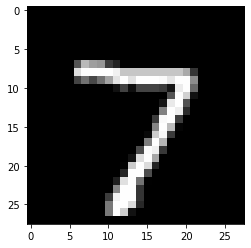

Predict: 7.0


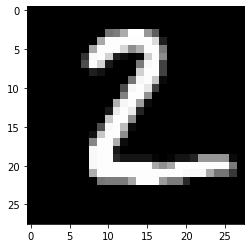

Predict: 2.0


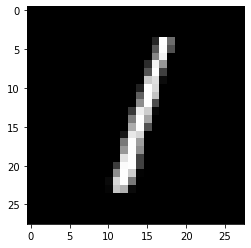

Predict: 1.0


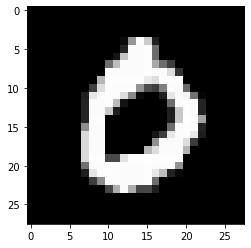

Predict: 0.0


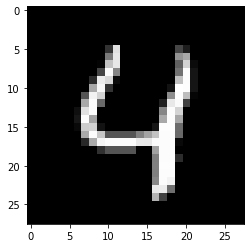

Predict: 4.0


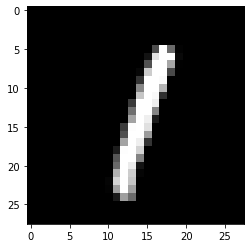

Predict: 1.0


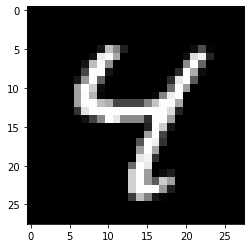

Predict: 4.0


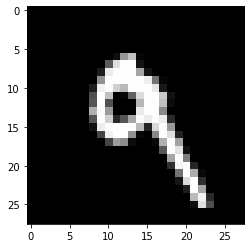

Predict: 9.0


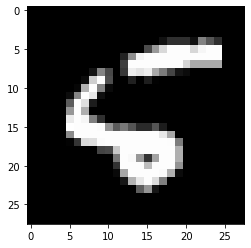

Predict: 5.0


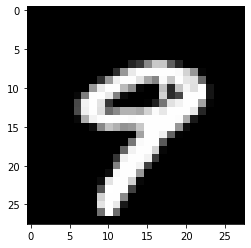

Predict: 9.0


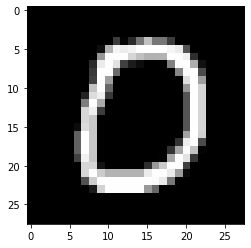

Predict: 0.0


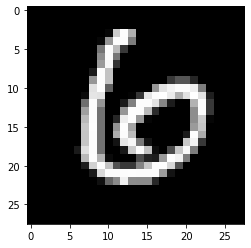

Predict: 6.0


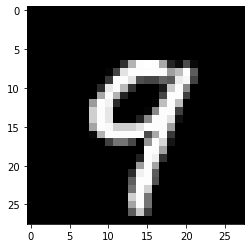

Predict: 9.0


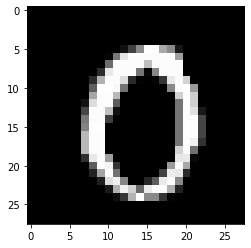

Predict: 0.0


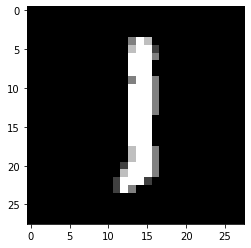

Predict: 1.0


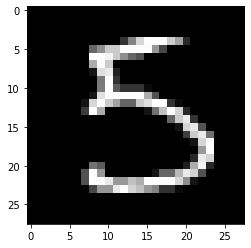

Predict: 5.0


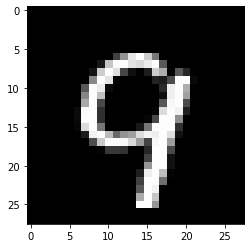

Predict: 9.0


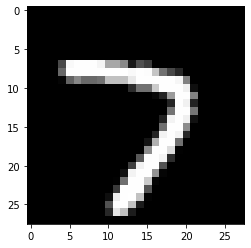

Predict: 7.0


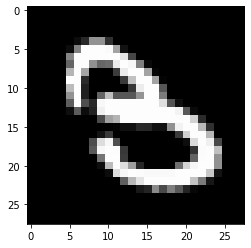

Predict: 3.0


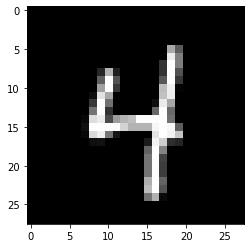

Predict: 4.0


In [22]:
n_test = 20
test(model, x[:n_test], y[:n_test], to_be_shown=True)

## 19.7 마치며

### 요약

1. RNN
 - 순서 데이터를 다루기에 적합하다.
 - NLP분야에서 가장 널리 활용된다.
 - RNN의 동작 원리를 정확하게 이해하기 위해서 입출력 텐서 형태만 맞춘다면 잘 동작할 것이다.
 - BPPT 알고리즘에 의해 학습된다.
 - 기본 RNN은 그래디언트 소실이 발생하게 되고, 긴 순서 데이터에 대하여 적절한 파라미터 업데이트를 할 수 없어 긴 순서 데이터를 다루지 못한다.

2. LSTM
 - 내부에 시그모이드로 구성된 3개의 게이트를 가지고 있다.
 - 게이트가 미분시에 그래디언트를 보존하는 역할을 한다.
 - 기본 RNN에 비해 파라미터가 많고 속도가 느릴 수 있지만, 많은 데이터와 빠른 하드웨어로 충분히 극복이 가능하다.
 - 그래디언트 소실 문제가 해결되지만 신경마의 수용 능력에는 한계가 있기 때문에 무한정 긴 데이터를 다룰 수 없다. 더 긴 데이터를 다루기 위해선 어텐션 기반인 트랜스포머를 사용해야한다.

3. 활용 형태
 - 자기 회귀란 현재 상태가 과거 상태에 의존하여 정해지는 경우를 가리킨다.

|타입|입력|출력|자기회귀 여부|양방향 가능 여부|사용 예|
|-|-|-|-|-|-|
|다대일|순서 데이터|순서 데이터 아님|X|O|텍스트 분류|
|다대다|순서 데이터|같은 길이의 순서 데이터|X|O|형태소 분석|
|일대다|순서 데이터|다른 깅이의 순서 데이터|O|X|자연어 생성(번역, 챗봇 등)|